### __About The Data__

The data we'll be using comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), and contains the following attributes about red wine:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dixoide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol (%)
- quality

We adjusted the dependent variable, 'quality', to make it a little more continuous.

### __Problem Statement__

Let's say we are part of a data science team that is contracted out as consultants for different companies. In this scenario, we have been assigned a contract with a red wine company which makes a special Cougar Red Blend wine. They have a number of different varieties, each given different quality scores. The wine company has collected different characteristics about their different wines over the years, but they want to know how these variables impact a wine's quality rating. They have no idea what tools to use to do this!

In general, the company would like to know:

- Which variables are significant in predicting the quality of a Cougar Red Blend
- How well those variables describe the quality of the wine

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW1.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

In [1]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

### __Part 2. Reading and Understanding the Data__ ###

Import the data using Pandas into a dataframe named `wine_df`. Then, display the first 5 rows

In [2]:
wine_df = pd.read_csv('wine_quality.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


Print some basic statistics of the data

In [3]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function

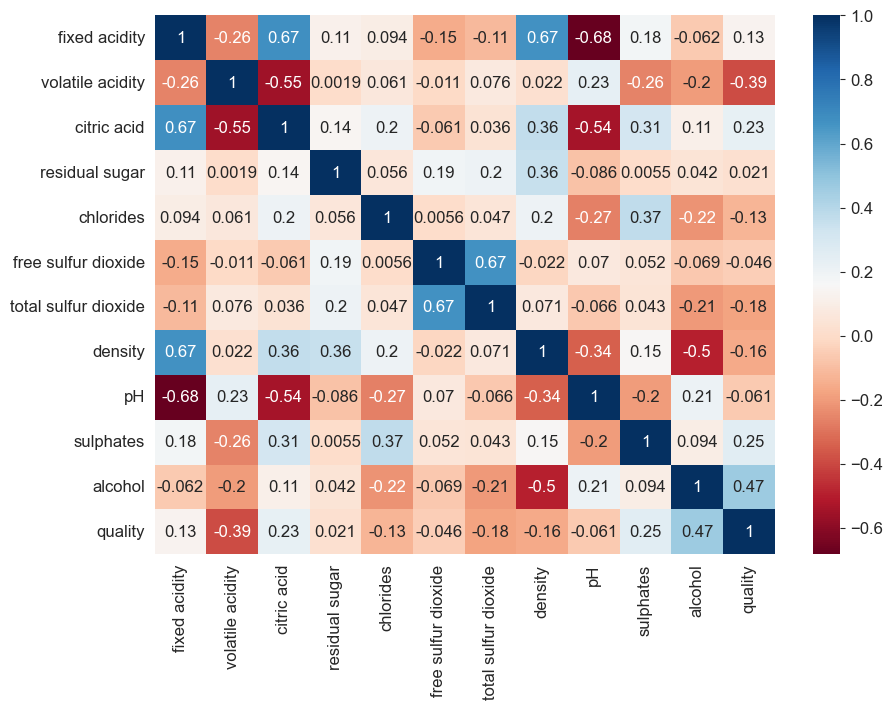

In [4]:
sns.heatmap(wine_df.corr(), cmap = "RdBu", annot = True)
plt.show()

__Q1__: Does this reveal anything interesting for us? If so, what?

(After each question is a cell that we changed from 'Code' to 'Markdown'. Instead of reading Python code, Jupyter will read these as Markdown blocks, which is a way to code/format text. Here is a [Markdown Basic Guide](https://www.markdownguide.org/basic-syntax/))

<p>There are no instances of strong collinearity between the attributes. All moderate instances of positive or negative correlation are expected due to being between attributes that measure similar things such as certain levels of various acids and the pH levels of the wines.</p>

Using Seaborn regplots, plot *__each__* feature in the same style as the plot below. (Use a for loop. There should be 11 plots like the one below. Try experimenting with different colors, too!)

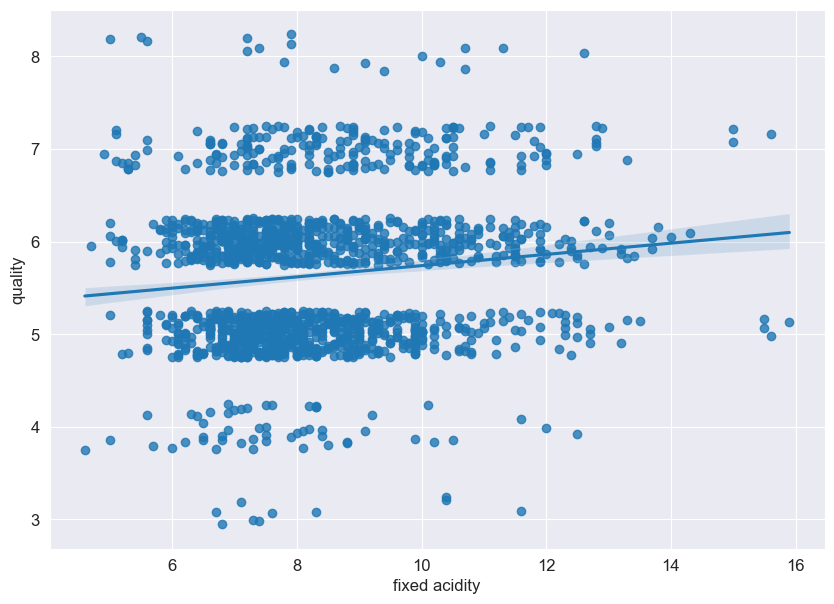

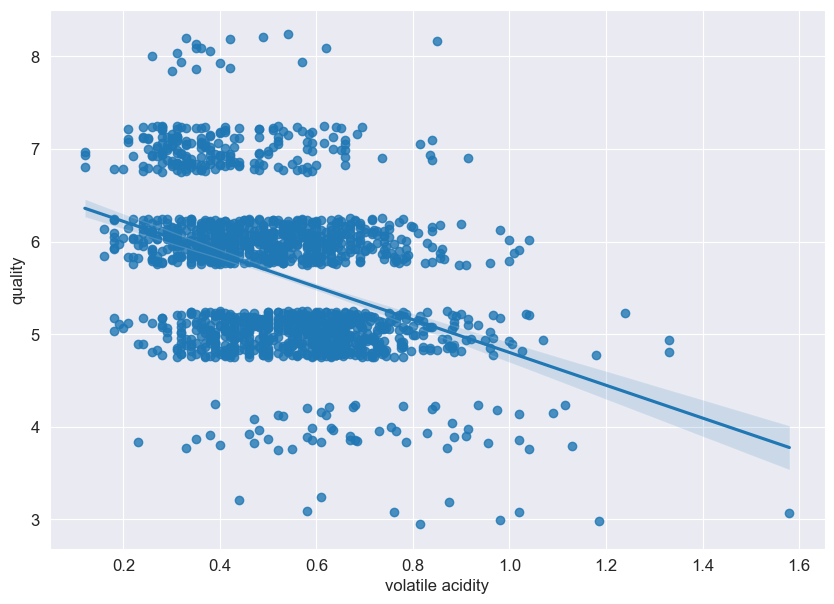

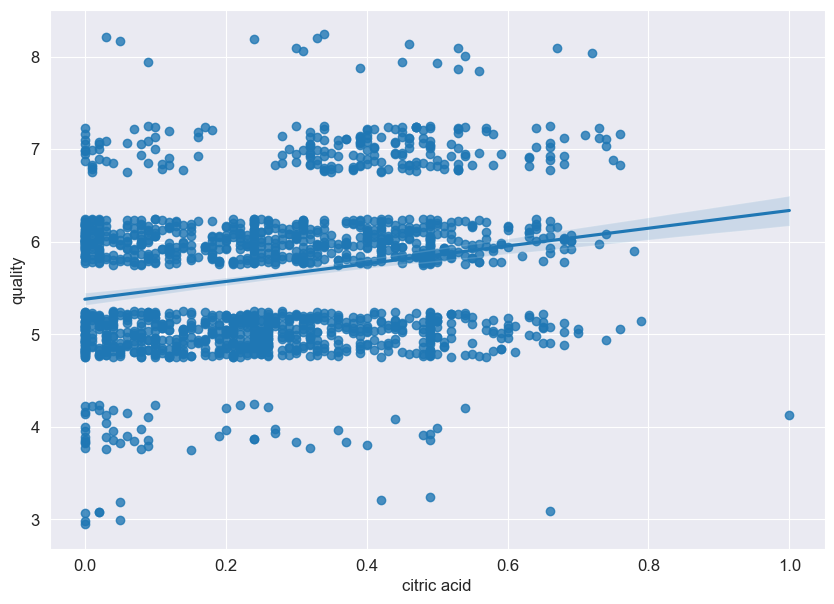

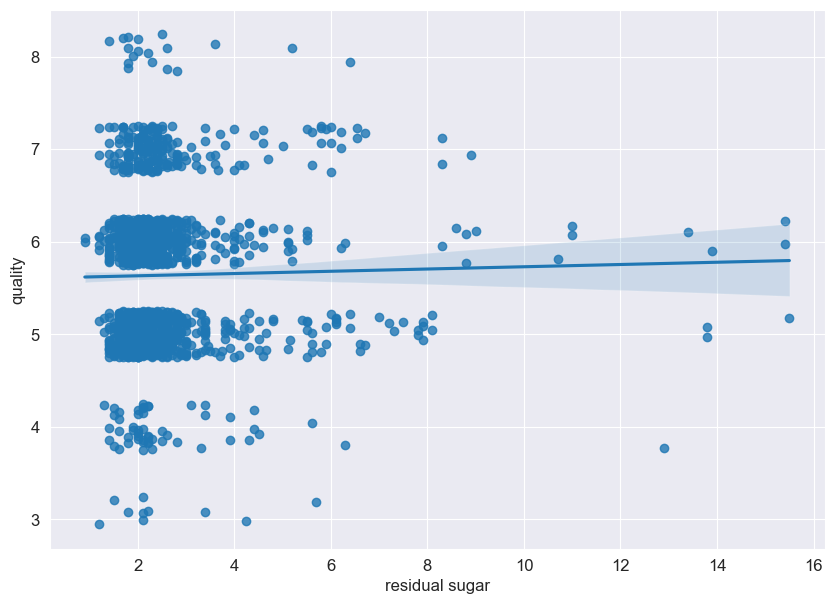

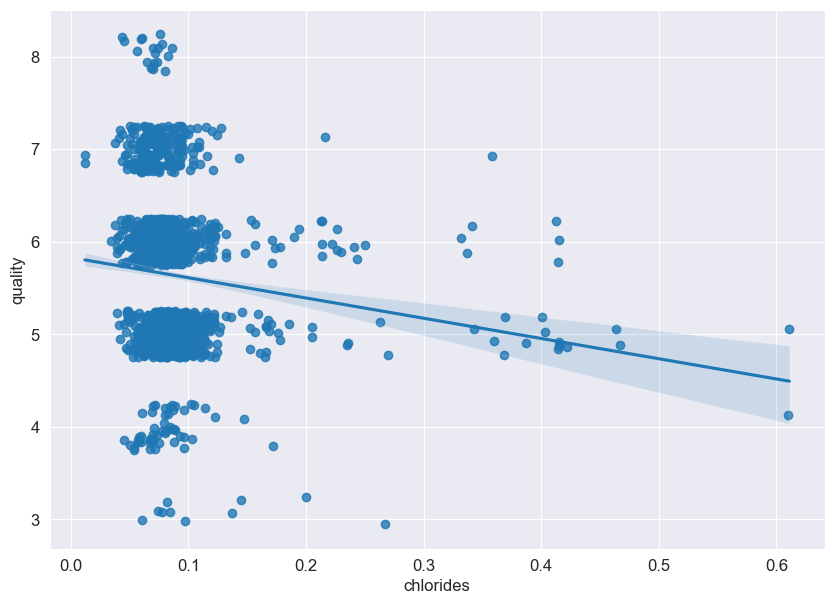

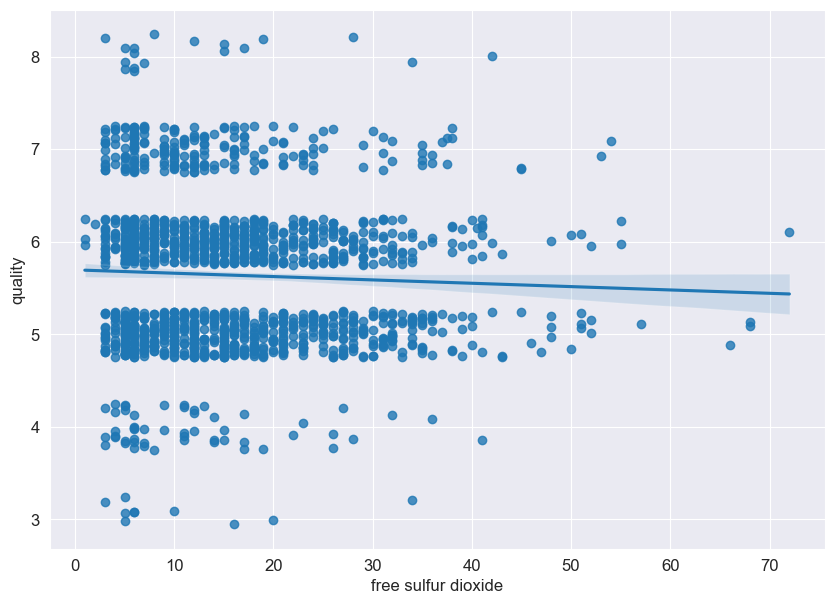

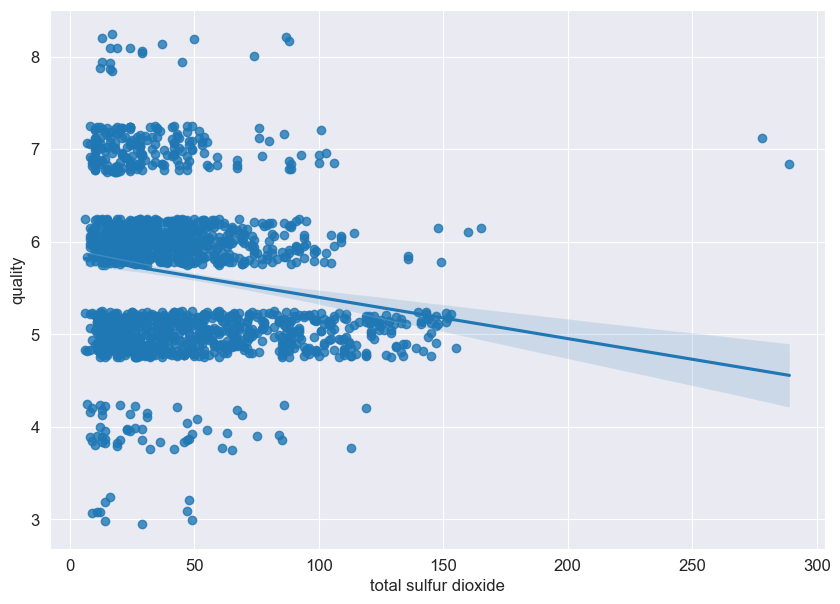

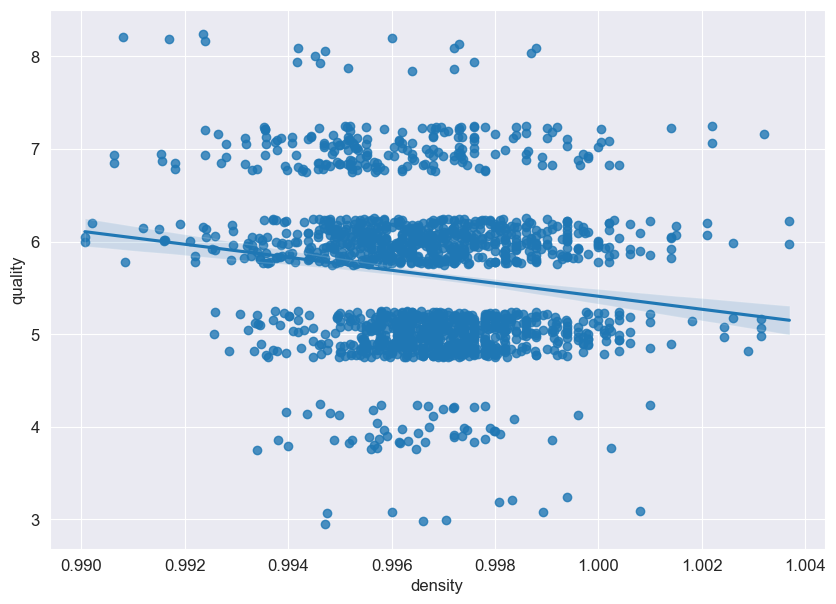

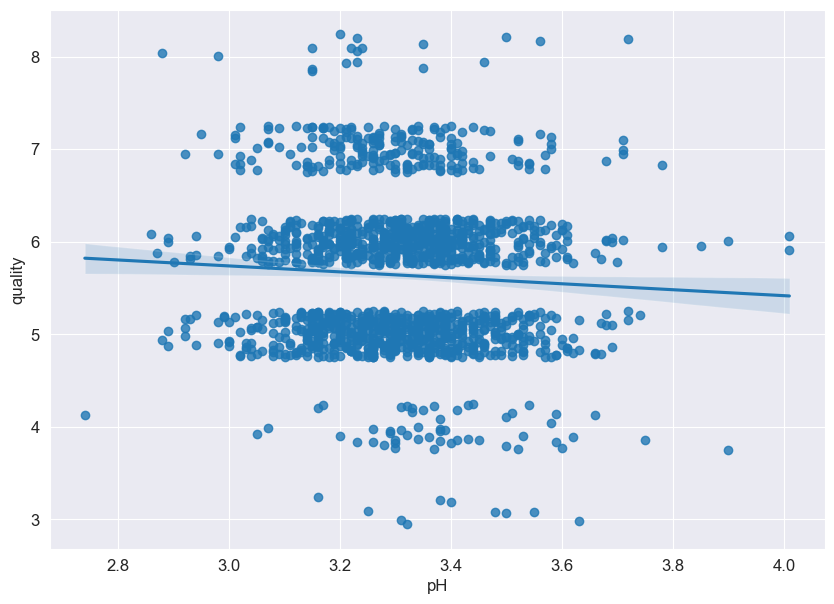

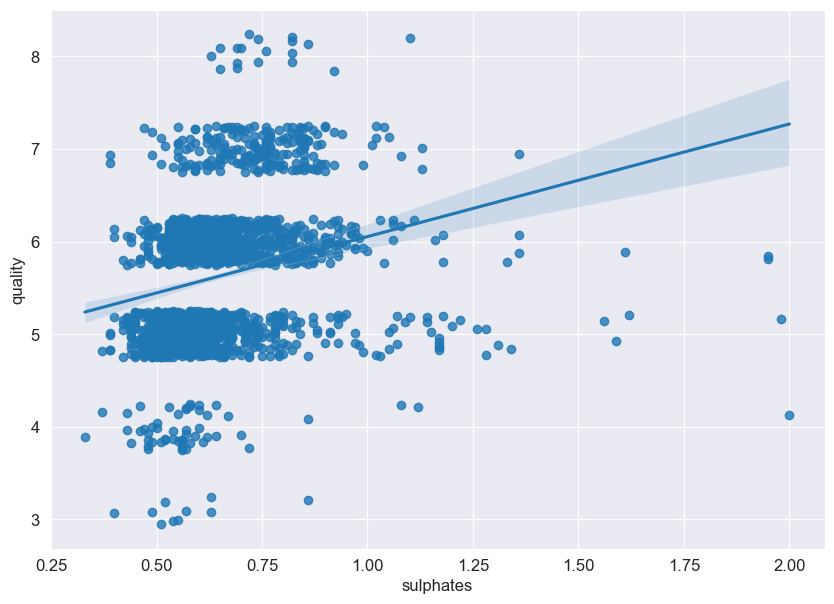

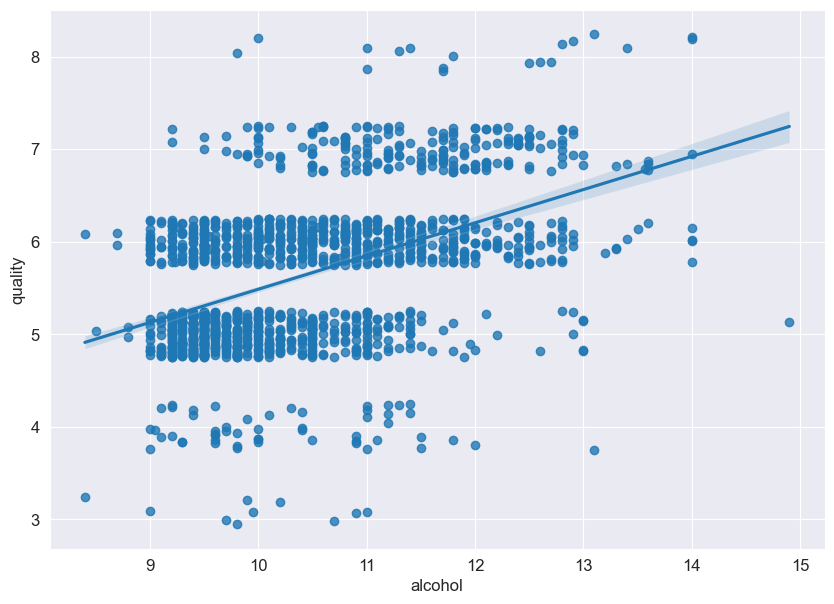

In [5]:
for i in wine_df:
    if i != 'quality':
        sns.regplot(x = i, y = 'quality', data = wine_df)
        plt.show()

__Q2__: Is there anything that sticks out? What features seem to have the strongest relationship with quality?


<p>Alcohol content and volatile acidity demonstrate the strongest relationships with quality, being a minor positive correlation and a minor negative correlation respectively</p>

__Q3__: How do these findings compare with your conclusions gathered from the correlation matrix?

<p>These findings line up exactly with the correlation as alcohol and volatile acidity both showed the greatest absolute correlation with quality while also not being great enough to constitute a strong correlation</p>

### __Part 3. Data Cleaning and Preparation for Analysis__

Use Pandas to find if there are any missing values in the data set

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


__Q4:__ If there were missing values, how do you think you would deal with them in this data set?





<p>If I were dealing with missing values for a categorical variable, I would fill said values with the mode of the attribute. If it were numeric variables, I would choose either the mean or the median to fill the values. The choice between the two would depend on whether or not the data exhibits a Gaussian distribution or not</p>

__Q5:__ Are there any categorical features in the data set? If so, which ones are they?

(HINT: Remember, Categorical variables are those whose numbers are representations of a certain category. For example, if there is a "Gender" feature, we might change all "male" values to 1 and all "female" values to 2. In this sense, the numbers don't have any real meaning, but are a way we can turn non-numerical attributes into numbers that we can then use in our models.)

<p>There are no categorical variables as all measure values on a numeric scale</p>

Using Pandas replace, encode any categorical variables accordingly. 

In [7]:
# No categorical variables

In order to run the models, we will create a Pandas dataframe `X`, containing the independent variables, and an array of the dependent variable, `y`. But before we do that, we should scale our data. 

However, what's the best way to scale?

First, let's create an `X_unscaled` Pandas dataframe from our `wine_df` dataframe. Then, create a `y_unscaled` Pandas series of the dependent variable, 'quality'.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X_unscaled = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].copy()
y_unscaled = wine_df['quality'].copy()

Next, use Sci-Kit Learn's MinMaxScaler and StandardScaler (imported above) to create new sets of pandas dataframes from `X_unscaled`:
- `X_mm` (Using MinMaxScaler)
- `X_ss` (Using StandardScaler)

** The Scaler functions output 2D arrays, so you will need to turn them back into Pandas Dataframes, which can be passed directly to the Linear Regression function.

__Q6__: What statistical assumption does the Standard Scaler make about the data? Why might this be important?



<p>Standard Scaler assumes that the distribution is normal in nature. This is important because if the distribution is not normal then the standardized mean and standard distribution could be biased and not be a proper representation of the actual data</p>

__Q7__: What do you think the effect will be on using Linear Regression on differently scaled (or unscaled) data?

<p>The effect will vary based on the magnitude of the unscaled data. Unscaled data will be measured by its own metric, meaning that differing magnitudes of measurements can create wildly incorrect representations of data when plugged into a linear regression. For example, even if there is strong correlation between two attributes, if one is measured in kilometers and the other is measured in centimeters, the graph might come out looking flat and an untrained eye might use that as a basis to conclude there is no correlation</p>

In [9]:
ss_scaler = StandardScaler()

X_ss_scaled = ss_scaler.fit_transform(X_unscaled)
X_ss = pd.DataFrame(data = X_ss_scaled, columns = X_unscaled.columns)
X_ss.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [10]:
mm_scaler = MinMaxScaler()

X_mm_scaled = mm_scaler.fit_transform(X_unscaled)
X_mm = pd.DataFrame(data = X_mm_scaled, columns = X_unscaled.columns)
X_mm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


Our final task before performing Linear Regression is to separate our data into training and testing sets. We have 3 different X dataframes, each with the same data but scaled differently:
- `X_unscaled`
- `X_ss`
- `X_mm`

Use Sci-Kit Learn's train_test_split function to create a training and testing set for each of the 3 data sets (Use `y_unscaled` for each of the data sets):
- `train_X_unscaled`, `train_y_unscaled`, `test_X_unscaled`, `test_y_unscaled`
- `train_X_ss`, `train_y_ss`, `test_X_ss`, `test_y_ss`
- `train_X_mm`, `train_y_mm`, `test_X_mm`, `test_y_mm`

Use a train/test split of 80/20

In [11]:
train_X_unscaled, test_X_unscaled, train_y_unscaled, test_y_unscaled = train_test_split(X_unscaled, y_unscaled, test_size = 0.2)
train_X_ss, test_X_ss, train_y_ss, test_y_ss = train_test_split(X_ss, y_unscaled, test_size = 0.2)
train_X_mm, test_X_mm, train_y_mm, test_y_mm = train_test_split(X_mm, y_unscaled, test_size = 0.2)

### __Part 4: Model Creation and Evaluation__

Now, we have 3 sets of data sets, and we will use each of them to do Linear Regression modelling. For *__each__* of the 3 data sets, do the following (the output of using unscaled data is below):

1. Create a Sci-kit Learn Linear Regression model, and train (fit) it on the training data.
2. Use this model to predict quality values for the corresponding test_X values, and save these test predictions as `predictions`.
3. Use `predictions` and `test_y` values to calculate `residuals`
4. Create a Seaborn scatter plot of the true quality vs. the predicted quality of the test set.
5. Create a Seaborn histogram of the residuals.
6. Print the $R^{2}$ value using the test values.

C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


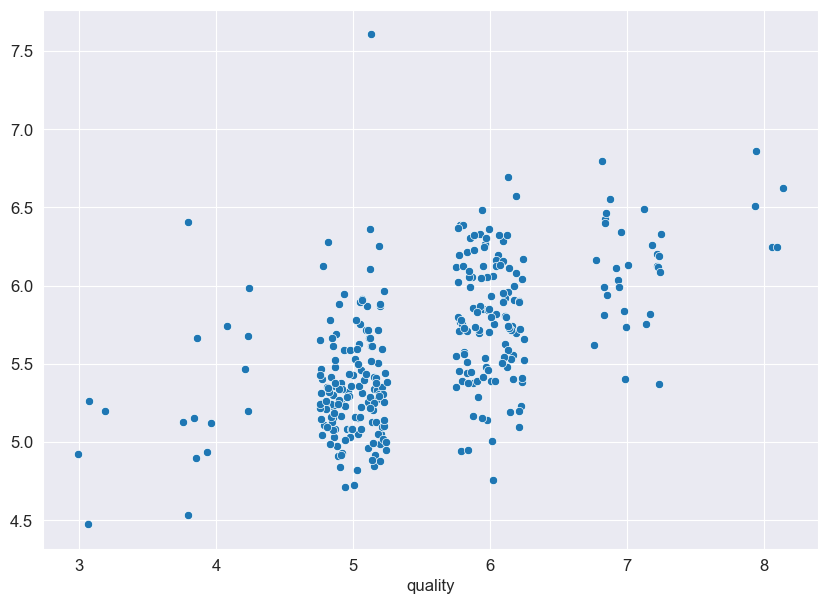

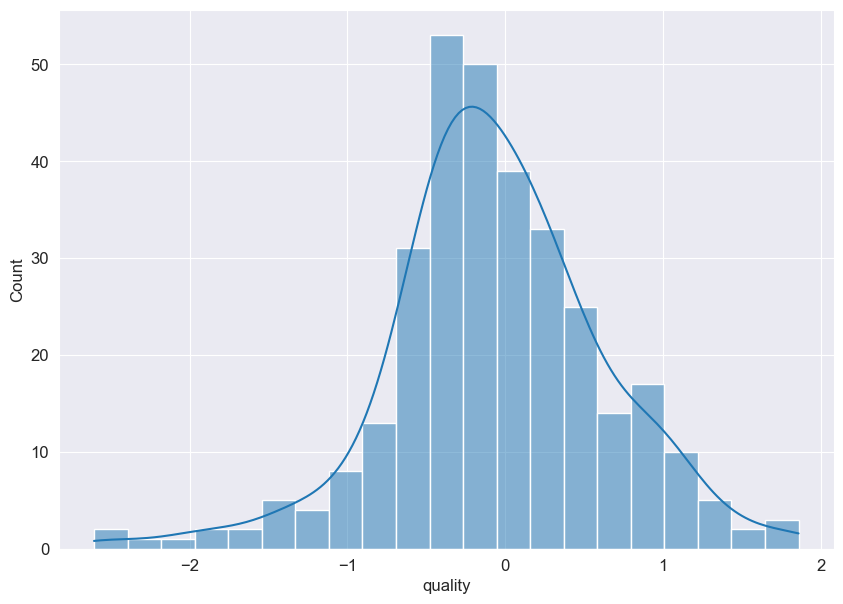

R2 Score: 0.32912494927209535


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lm_unscaled = LinearRegression()
lm_unscaled.fit(train_X_unscaled, train_y_unscaled)
unscaled_predictions = lm_unscaled.predict(test_X_unscaled)
unscaled_residuals = test_y_unscaled - unscaled_predictions

sns.scatterplot(test_y_unscaled, unscaled_predictions)
plt.show()
sns.histplot(unscaled_residuals, kde = True)
plt.show()
print('R2 Score:', r2_score(test_y_unscaled, unscaled_predictions))

C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


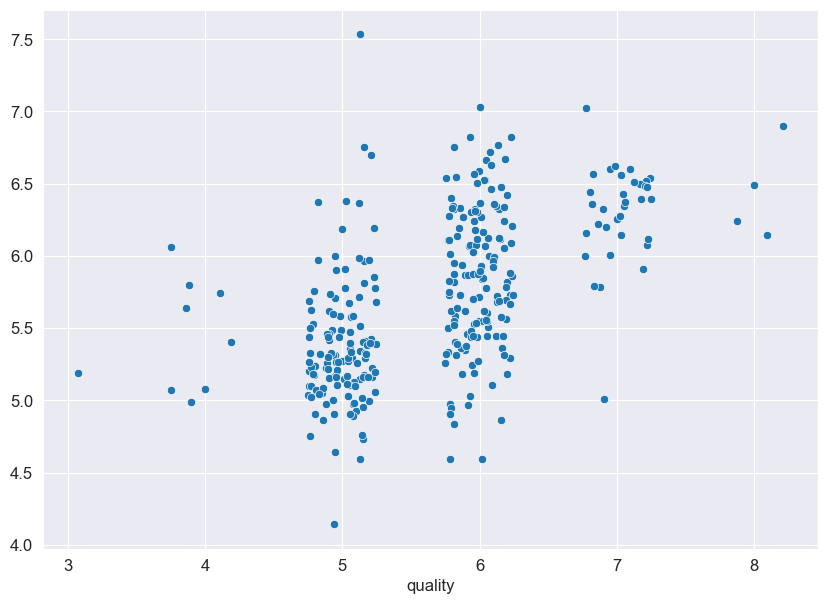

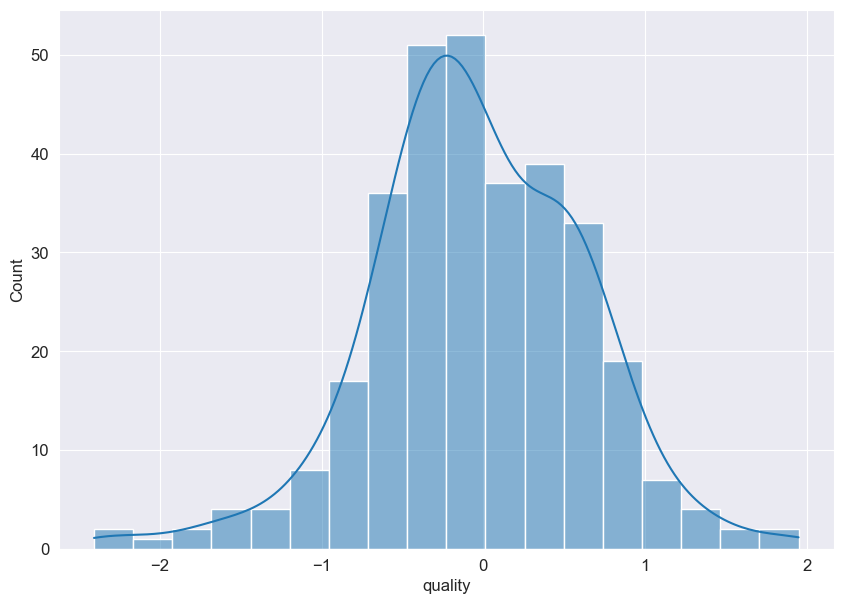

R2 Score: 0.2807111192316192


In [13]:
lm_ss = LinearRegression()
lm_ss.fit(train_X_ss, train_y_ss)
ss_predictions = lm_ss.predict(test_X_ss)
ss_residuals = test_y_ss - ss_predictions

sns.scatterplot(test_y_ss, ss_predictions)
plt.show()
sns.histplot(ss_residuals, kde = True)
plt.show()
print('R2 Score:', r2_score(test_y_ss, ss_predictions))

C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


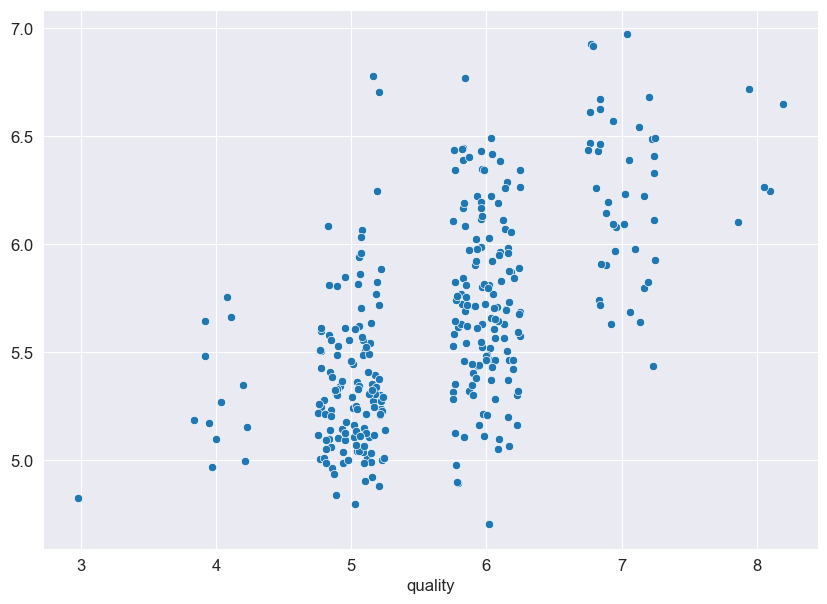

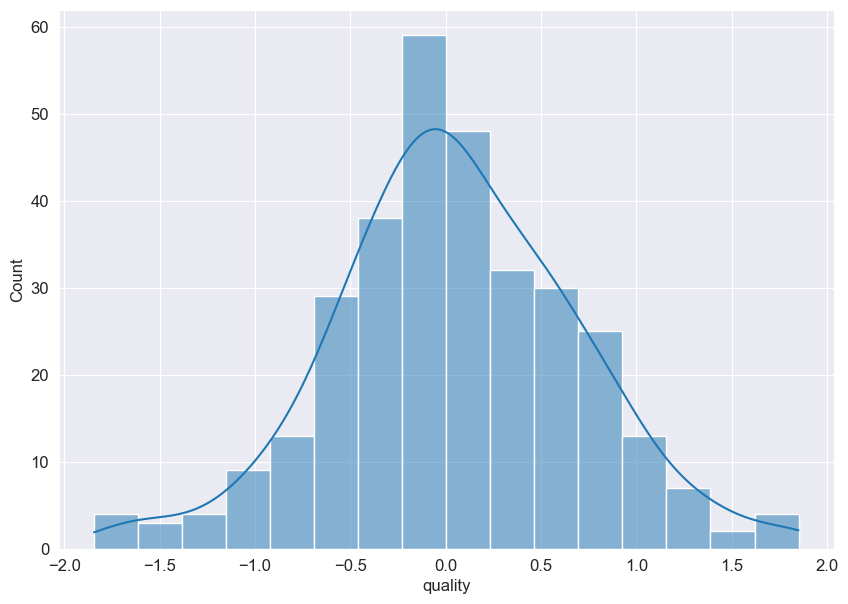

R2 Score: 0.36973322702887046


In [14]:
lm_mm = LinearRegression()
lm_mm.fit(train_X_mm, train_y_mm)
mm_predictions = lm_mm.predict(test_X_mm)
mm_residuals = test_y_mm - mm_predictions

sns.scatterplot(test_y_mm, mm_predictions)
plt.show()
sns.histplot(mm_residuals, kde = True)
plt.show()
print('R2 Score:', r2_score(test_y_mm, mm_predictions))

Finally, create a dataframe with all of the coefficients from each of the 3 models and compare.

In [15]:
coefficients = pd.DataFrame(lm_unscaled.coef_, X_unscaled.columns, columns = ['Unscaled'])
coefficients.insert(1, "StdScaler", lm_ss.coef_, True)
coefficients.insert(2, "MinMaxScaler", lm_mm.coef_, True)
coefficients

,Unscaled,StdScaler,MinMaxScaler
fixed acidity,0.049967,0.022506,0.287461
volatile acidity,-1.003758,-0.224017,-1.467803
citric acid,-0.160350,-0.054842,-0.164657
residual sugar,0.038570,0.018246,0.048741
chlorides,-1.893681,-0.101525,-1.259282
free sulfur dioxide,0.004053,0.040880,0.443199
total sulfur dioxide,-0.003263,-0.091302,-0.943026
density,-39.338453,0.001234,-0.186492
pH,-0.235473,-0.070114,-0.540723
sulphates,0.957396,0.174626,1.814903


__Q8__: As is often the case when working on real-world issues, the models may not necessarily fit perfectly. In these models, the $R^2$ values are relatively small. What does the $R^2$ value represent for our models?






<p>The R2 value tells us that between 27 and 33 percent of the variance in our wine quality can be accounted for based on all the other attributes that were taken into account</p>

__Q9__: In your estimation, which model performed the best, and why?

<p>The Standard Scaler model performed the best because it placed all the attributes on the same relative scale so that measurements could be performed fairly easily. However, it still performed poorly relative to what a "good" model would demonstrate</p>

__Q10__: We saw that the use of differing standardizing techniques produced different results, with different coefficients and different $R^2$ values. Why do you think this is?


<p>The differences in standardizing technique results can likely be chalked up to the different characteristics of the data for each attribute. Attributes that had large ranges and outliers could've likely thrown off the MinMaxScaler, non-gaussian distributions might have thrown off the StandardScaler, and the varying scales on which the attributes were originally measured on could've thrown off the unscaled data</p>

__Report__


The most important part of any data science project is interpretting and communicating the results to the appropriate stakeholder, whether that be a boss, client, or another team member. Given all of the analysis you've done so far, write a short report (2 - 3 paragraphs) summarizing the analysis you did, the results, and the conclusions you came to, supporting your conclusions with your analysis. Feel free to do any more analysis you wish or to modify code you've already used. Curiosity is often rewarded!

<p>The given data on various wines was analyzed to attempt to determine what factors play a role in the quality of said wine. Of the possible quantities to measure, ones concerning acidity, chemical composition, and alcohol content were chosen. However, none of the chosen attributes actually demonstrated a meaningful correlation between themselves or wine quality</p>
<br>
<p>Looking over the three types of analysis performed on the data, none of them provided strong indications that the factors that we chose contributed to wine quality in a significant way. A likely reason for this is due to the subjectivity of the measured idea of "quality". While it is true that some wines are objectively made better or prepared with better ingredients, multiple outside studies have shown that wine itself is extremely subjective and up to the consumer's perspective more so than the wine manufacturer's process</p>
<br>
<p>However, if a correlation must be derived from the given analysis, the two most likely candidates for influencing wine's quality are the alcohol content level and the volatile acidity level. A slight improvement in quality could likely be garnered by increasing the alcohol content slightly above the average level and decreasing the volatile acidity level below the average</p>